In [ ]:
# Refer the README file on GitHub

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [85]:
# set a seed to generate reproducible results
np.random.seed(1)

# 1000 random data points between 0 and 10
random_data = np.random.rand(1000)*10

In [86]:
random_data.shape

(1000,)

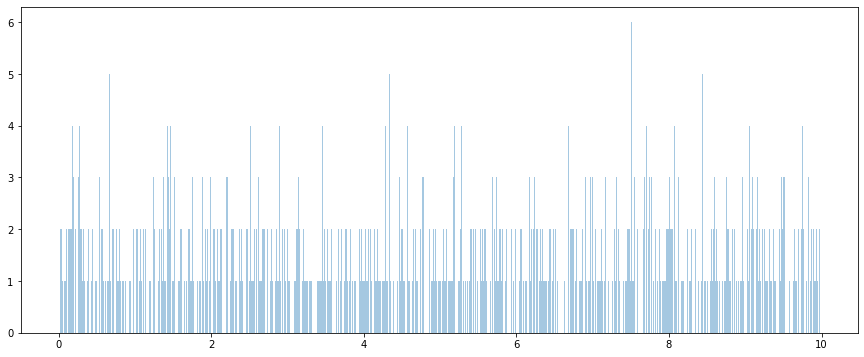

In [87]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

#plot a histogram of the generated random_data
sns.distplot(a=random_data, bins=1000, kde=False)

In [88]:
# creating input features
# create a dict where each consecutive column is as a sequetial power of the random_data we generated.
column_data = {}
for i in range(10):
    column_data[i] = random_data**(i+1)

In [89]:
df = pd.DataFrame(column_data)

In [90]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,4.170220,17.390735,7.252319e+01,3.024377e+02,1.261232e+03,5.259613e+03,2.193375e+04,9.146855e+04,3.814440e+05,1.590705e+06
1,7.203245,51.886738,3.737529e+02,2.692234e+03,1.939282e+04,1.396912e+05,1.006230e+06,7.248121e+06,5.220999e+07,3.760814e+08
2,0.001144,0.000001,1.496205e-09,1.711282e-12,1.957276e-15,2.238631e-18,2.560430e-21,2.928487e-24,3.349452e-27,3.830929e-30
3,3.023326,9.140498,2.763470e+01,8.354871e+01,2.525950e+02,7.636769e+02,2.308844e+03,6.980387e+03,2.110398e+04,6.380422e+04
4,1.467559,2.153729,3.160724e+00,4.638549e+00,6.807344e+00,9.990179e+00,1.466118e+01,2.151614e+01,3.157620e+01,4.633994e+01


In [91]:
# summary statistics for the dataframe
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.006046,33.375435,2.497517e+02,1.992427e+03,1.655771e+04,1.415612e+05,1.235796e+06,1.096189e+07,9.846957e+07,8.936245e+08
std,2.885006,29.654450,2.815395e+02,2.645585e+03,2.490154e+04,2.353690e+05,2.234666e+06,2.130481e+07,2.038662e+08,1.957129e+09
min,0.001144,0.000001,1.496205e-09,1.711282e-12,1.957276e-15,2.238631e-18,2.560430e-21,2.928487e-24,3.349452e-27,3.830929e-30
25%,2.519346,6.347107,1.599057e+01,4.028584e+01,1.014942e+02,2.556995e+02,6.441972e+02,1.622961e+03,4.088815e+03,1.030118e+04
50%,5.075008,25.755725,1.307107e+02,6.633592e+02,3.366563e+03,1.708539e+04,8.670886e+04,4.400503e+05,2.233271e+06,1.133394e+07
75%,7.506713,56.350735,4.230088e+02,3.175406e+03,2.383686e+04,1.789365e+05,1.343225e+06,1.008320e+07,7.569171e+07,5.681960e+08
max,9.973229,99.465287,9.919900e+02,9.893343e+03,9.866857e+04,9.840442e+05,9.814098e+06,9.787824e+07,9.761621e+08,9.735487e+09


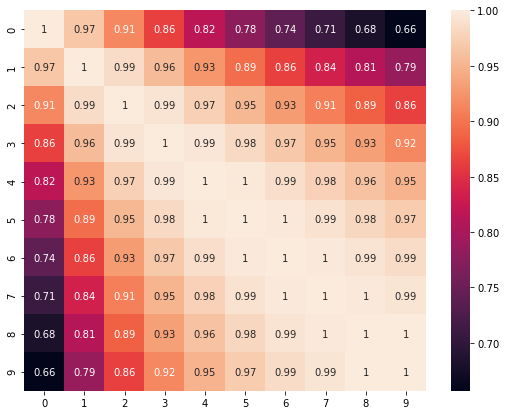

In [92]:
# check correlation between the features

plt.figure(figsize=(9,7))

corr = df.corr()
sns.heatmap(corr, annot=True)#, xticklabels=corr.columns, yticklables=corr.columns)

In [111]:
# lets create a target variable y, which is the sum of all columns in a row for the df.

y = df.sum(axis=1)
y.head()

0    2.092469e+06
1    4.367079e+08
2    1.145058e-03
3    9.533705e+04
4    1.423115e+02
dtype: float64

In [113]:
# Divide the data into training and validation subsets

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df, y, train_size=0.8, test_size=0.2, random_state=1)

In [148]:
# standardize features for PCA

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid))

In [116]:
# after scaling, you can see, for each column, the mean = 0 and std. deviation = 1.

X_train_scaled.describe().style.apply(lambda x: ['background: lightgreen' 
                                  if (x.name == 'mean' or x.name == 'std')
                                  else '' for i in x], axis=1)

,0,1,2,3,4,5,6,7,8,9
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
std,1.000626,1.000626,1.000626,1.000626,1.000626,1.000626,1.000626,1.000626,1.000626,1.000626
min,-1.744154,-1.132948,-0.895968,-0.762622,-0.674541,-0.610901,-0.562192,-0.523384,-0.491542,-0.464825
25%,-0.884494,-0.925387,-0.841613,-0.748234,-0.670738,-0.609900,-0.561929,-0.523316,-0.491525,-0.464821
50%,0.031431,-0.248958,-0.418239,-0.501652,-0.532187,-0.533562,-0.520357,-0.500846,-0.479444,-0.458351
75%,0.859987,0.767595,0.610035,0.443664,0.290275,0.157672,0.047395,-0.041850,-0.112529,-0.167443
max,1.698784,2.188246,2.583000,2.921068,3.220261,3.490518,3.738048,3.967089,4.180729,4.381315


In [117]:
# PCA on X_train_scaled (training data after scaling)

pca = PCA(n_components=0.95) # fraction of the variance you wish to capture
#pca = PCA(n_components=2)  #specify number of components

pca.fit(X_train_scaled)
pca.n_components_

#looks like only 2 PCA components are sufficient to capture 95% of the variance in 10 columns.

2

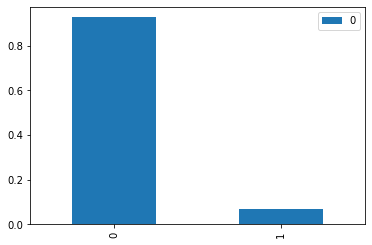

In [118]:
# percentage of variance explained by each component
#print(pca.explained_variance_ratio_)
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()

In [149]:
# create a dataframe with the PCA components for training and validation data

X_train_scaled_pca = pd.DataFrame(pca.transform(X_train_scaled))
X_valid_scaled_pca = pd.DataFrame(pca.transform(X_valid_scaled))

In [150]:
X_train_scaled_pca.head()

,0,1
0,9.735508,2.034531
1,-1.130228,-0.564740
2,3.685267,-0.628846
3,-2.028349,0.412389
4,-0.881300,-0.720676


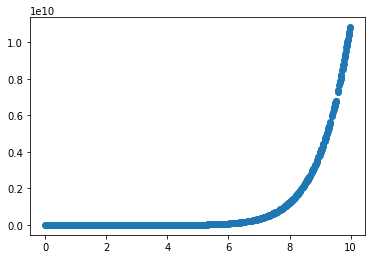

In [141]:
# plot between the original randomly generated numbers and the target
plt.scatter(x=X_train[0], y=y_train)

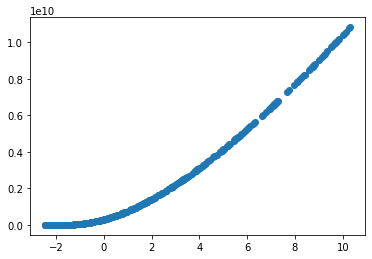

In [142]:
# plot between the 1st PCA component and the target
plt.scatter(x=X_train_scaled_pca[0], y=y_train)

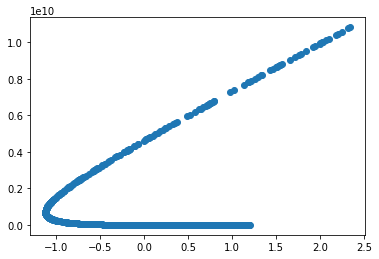

In [143]:
# plot between the 2nd PCA component and the target
plt.scatter(x=X_train_scaled_pca[1], y=y_train)

In [171]:
# train with the original training data (pre-scaling and pre-PCA) using linear regression

import sklearn.linear_model as lm
from sklearn.metrics import mean_absolute_error

regressor = lm.LinearRegression()
regressor.fit(X_train,y_train)
y_predicted = regressor.predict(X_valid)

In [170]:
regressor_scaled_pca = lm.LinearRegression()
regressor_scaled_pca.fit(X_train_scaled_pca,y_train)
y_scaled_pca_predicted = regressor_scaled_pca.predict(X_valid_scaled_pca)

In [158]:
# Our target is the sum of all input featues.
# We can see that the regression model has accuralely estimated the coefficients as 1 for all the input features.
regressor.coef_

array([0.99999909, 0.99999958, 1.00000068, 0.99999958, 1.00000016,
       0.99999996, 1.00000001, 1.        , 1.        , 1.        ])

In [159]:
# the regression intercept is almost 0, as expected.

regressor.intercept_

1.1920928955078125e-06

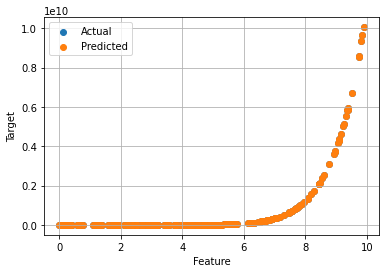

In [167]:
# For validation data, plot the values of actual target and predicted target.
# Since we are using all 10 input features to predict the target,
# linear regression does an excellent job at predicting the output.
# The predicted and target values almost exactly OVERLAP, when we used the original input features to predict the target. 

plt.scatter(x=X_valid[0], y=y_valid, label='Actual')
plt.scatter(x=X_valid[0], y=y_predicted, label='Predicted')
plt.grid(True)
plt.ylabel('Target')
plt.xlabel('Feature')
plt.legend()

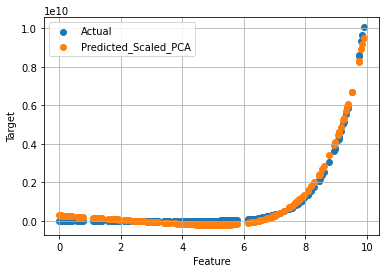

In [169]:
# this is a plot similar to the one above, but comparing the target values with the values predicted using PCA components.
# In this case, only 2 PCA components were able to capture 95% of the variance and generate predicitons similar to the
# model using 10 features.

plt.scatter(x=X_valid[0], y=y_valid, label='Actual')
plt.scatter(x=X_valid[0], y=y_scaled_pca_predicted, label='Predicted_Scaled_PCA')
plt.grid(True)
plt.ylabel('Target')
plt.xlabel('Feature')
plt.legend()